# Keras Tutorial 
- See https://keras.io


In [1]:
import keras
keras.__version__

'2.8.0'

## 1. Dataset

We will use a build-in data 'MNIST' which is a handwritten digit number image from 0 to 9

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Type of dataset

In [3]:
print('Feature type: %s'%type(train_images))
print('Label type: %s'%type(train_labels))

Feature type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>


### Type of value in the dataset

In [4]:
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


### Shape

In [5]:
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


### Dimension

In [6]:
print('Train_set Feature dimension: %s'%str(train_images.ndim))
print('Train_set Label dimension: %s'%str(train_labels.ndim))
print('Test_set Feature dimension: %s'%str(test_images.ndim))
print('Test_set Label dimension: %s'%str(test_labels.ndim))

Train_set Feature dimension: 3
Train_set Label dimension: 1
Test_set Feature dimension: 3
Test_set Label dimension: 1


### Characteristic of data 

In [7]:
# train_images[0]

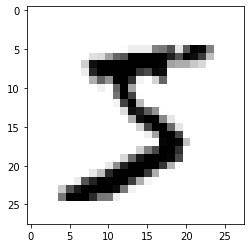

In [8]:
digit = train_images[0]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap=plt.cm.binary)

In [9]:
train_labels[0]

5

## 2. Create a fully-connect neural network model

In [10]:
from keras import models
from keras import layers

In [11]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [12]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [13]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 3. Preprocessing Data

In [14]:
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
test_labels.shape

(10000, 10)

## 4. Train Model

In [19]:
history = network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.2586 - accuracy: 0.9247
Epoch 2/5
469/469 [==============================] - 8s 18ms/step - loss: 0.1027 - accuracy: 0.9701
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0687 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0490 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0370 - accuracy: 0.9890


## 5. Evaluate Model

In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0690 - accuracy: 0.9790
Test Loss: 0.06901158392429352
Test Accuracy: 0.9789999723434448


In [21]:
history.history

{'accuracy': [0.9246666431427002,
  0.9701333045959473,
  0.9800166487693787,
  0.9853833317756653,
  0.9889500141143799],
 'loss': [0.2585757374763489,
  0.10267849266529083,
  0.06874822825193405,
  0.048988137394189835,
  0.036967672407627106]}